In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
import scipy.io as lm

In [2]:
#Loading the data
data = lm.loadmat('ex7data2.mat')
x = data['X']
# Intitialize the value of centeroids 
# to test the validity of the following functions
init_centr = np.array([[3,3],[6,2],[8,5]])

In [3]:
# finding closest centroids to every data point
def findClosestCentroids(x,c):
    Lx = x.shape[0]
    K = c.shape[0]
    dist = np.zeros((Lx,K))
    for j in range(0,K):
        dist[:,j] = np.sum(np.abs(x-c[j])**2,axis=-1)
    assigned = np.argmin(dist,1)+1
    return assigned
#Testing the function 
findClosestCentroids(x,init_centr)[:3]

array([1, 3, 2])

In [4]:
# finding the new centroids 
def computeCentroids(assigned,x):
    K = len(np.unique(assigned))
    x_dim = x.shape[1]
    centroid = np.zeros((K,x_dim))
    for i in range(0,K):
        index = assigned == (i+1)
        centroid[i] = np.mean(x[index],0)
    return centroid

In [5]:
# finding the centers of the k clusters|MAX-> Maximum number of itteration 
def knn(x,K,MAX):
    index = random.sample(range(0,x.shape[0]), K)
    centroids = x[index]
    placeholder = np.zeros(centroids.shape)
    maxitter = 0
    while ((np.sum(centroids-placeholder)!= 0) & (maxitter < MAX)):
        placeholder = np.copy(centroids)
        assigned_c = findClosestCentroids(x,centroids)
        centroids = computeCentroids(assigned_c,x)
        maxitter +=1 
    return centroids

In [6]:
# Part one of the assignment
part1 = knn(x,3,500)

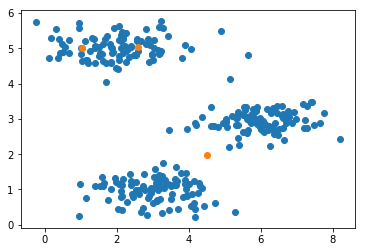

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(part1[:,0],part1[:,1])

The shape of the image is  (128, 128, 3)


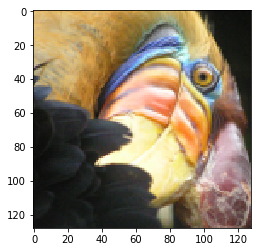

In [8]:
# Image compression with KNN
import matplotlib.image as mpimg

img = mpimg.imread('bird_small.png')
plt.imshow(img)
print "The shape of the image is ", img.shape

In [9]:
# 16 Most common colours
Nimg = img.reshape(16384,3) # 128*128  = 16384

In [10]:
# 16 Centeroids
NN = knn(Nimg,16,500)
#converges under 200 itteration

In [11]:
#Assigning the data to the centers
assign = findClosestCentroids(Nimg,NN)

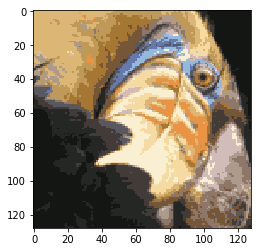

In [12]:
#Compressed Imgage
CompressedImg = np.copy(Nimg)
for i in range(0,16):
    CompressedImg[assign==(i+1)] = NN[i]
plt.imshow(CompressedImg.reshape(128,128,3))